# 제목 : 네이버 웹툰 구독(메일링) 및 자동저장 프로그램
****
                                                                                    
                                                                            
**학과 :컴퓨터정보공학부**  
**학년 : 1학년**

**이름 : 김영우**  
************

## 1. 과제 개요
* 매일 특정 주기로 요일별 네이버 웹툰의 업데이트를 확인한다. 
* 컴퓨터에 개인 소장용으로 업데이트된 웹툰을 저장한다.
* 업데이트된 웹툰의 내용을 메일로 발송한다
*****
## 2. 문제정의와 필요성
     웹툰을 보기 위해 매일같이 사이트에 방문하여야하고 일정시간이 지나면 몇화까지 보았는지 잊어먹기도한다. 많은 사람들이 자신이 보는 웹툰을 일정한 시간에 받아 볼 수 있으면 좋을 것이라 생각했다.
     
     즐겨찾는 웹툰을 요일에 상관없이 엑셀에 저장해놓고, 일정주기로 프로그램을 실행하여 웹툰이 업데이트 될때마다 자동으로 메일을 통해 받는다. 메일로 보내진 웹툰은 개인소장용으로 저장된다. 
     
     웹툰을 보기위해 매일같이 웹툰 사이트에 들어가지 않아도 되며, 메일을 확인하며 한번에 웹툰을 읽을수 있기 때문에, 루틴을 줄이고 시간을 절약할 수 있다.

****


## 3. 개발 개요
함수단위로 개요를 작성하였으며, 완성후 수정하였다.

### 3-1 엑셀에 저장되어있는 값 불러오기
web = webtoon_list()를 통해 엑셀에 저장되어있는 웹툰정보를 불러와 list변수인 web에 저장한다.

### 3-3 웹툰 요일 판단 및 최신화 판단
date_webtoon(n,web)을 통해 해당 요일의 해당되는 웹툰이 리스트에 있는지 서치한다.  
서치한 웹툰을 webtoon_check(web,url,i)함수를 통해 최신화나 나왔는지 판단한다.

### 3-3 웹툰 다운로드 및 메일발송
웹툰의 최신화가 업데이트 되었다고 판단 하였을시  
send_mail(name,title,number,link) 함수를 통해 웹툰을 메일로 보낸다.  
webtoon_download(episode_url,title,name,number) 함수를 통해 웹툰을 저장한다.

### 3-4 업데이트 내용 저장
save_webtoon(web)함수를 통해 업데이트 내용을 엑셀파일에 저장한다.

### 3-5 주기적 실행
schedule모듈을 이용하여 위 3-1 ~ 3-4과정을 매일일정 시간에 반복한다.

****

## 4. 개발 내용
### 4-1. 실행 필요 자료
* 소스코드 - python_최종과제_2017202011_김영우.ipynb 
* 엑셀 파일 - webtoon_list.xlsx
* 폰트파일 - CookieRun Black.ttf (경고문을 적기 위한 폰트 파일) 

### 4-2. 사용 모듈
* 요일을 구하기 위한 time 모듈
* 파일을 다루기 위한 os, sys 모듈
* 엑셀을 다루기 위한 openpyxl
* 메일을 발송하기 위한 smtplib모듈과 email 패키지
* 크롤링을 위한 BeautifulSoup4, requests 모듈
* 저장할 웹툰의 이미지를 합치고 가공하기 위해 pillow모듈
* 주기적인 실행을 위한 schedule 모듈




    아래의 3개의 모듈을 제외하고 나머지는
    파이썬 기본 모듈과 아나콘다 내장모듈을 사용하였다.


In [1]:
!pip install  BeautifulSoup4
!pip install requests
!pip install schedule

### 4-3 코드 (함수) 리뷰

### 1) 엑셀에서 검색할 웹툰을 찾는 함수 - webtoon_list()
webtoon_list 엑셀파일에 저장되어있는 웹툰의 이름 : 횟수정보(ex. 132화 -> 132)의 저장된 값을 불러와 리스트로 반환한다.  
이때 엑셀에 저장되는 웹툰의 이름은 네이버 웹툰 페이지의 웹툰 이름을 기반으로 하며, 화수는 네이버 웹툰 리모컨의 화정보를 기준으로 한다.

In [1]:

def webtoon_list() : #요일을 인자로 입력받는 함수

    from openpyxl import load_workbook
    week = load_workbook('webtoon_list.xlsx',data_only=True) # 엑셀에 저장되어 있는 요일 시트 가져오기


    web=[]
    sheet = week['Sheet1']
    for row in sheet.iter_rows(): #행단위로 반복
        
        for cell in row:
            web.append(cell.value)
           
    i=0     
    web = [web[i * 2:(i + 1) * 2] for i in range((len(web) + 2 - 1) // 2 )]
    # x행 2열 중첩리스트로 나누기
    #web[만화개수][0= 만화이름,1=화수]    
    
    if(web[0][0] == None): # 웹툰의 목록이 없을시
        return -1
    
    return web

#test code
#web = webtoon_list()
#print(f'목록 : {web} \n\n')


### 2) 업데이트된 값을 엑셀에 저장하는 함수 - save_webtoon(web)
웹툰의 리스트정보를 인자로 입력받는다.
메일전송, 다운로드 등 모든 절차가 끝나고, 화수정보가 수정된 web리스트를 다시 엑셀에 적용시켜 저장한다.  
이때 기존의 엑셀과 바교하여 횟수 정보가 업데이트 된 곳만 수정한다.

In [2]:


def index2cell(row, col): # 파이썬의 행렬 표현 방식(0,1) 을 엑셀시트(A1)로 표현
    from openpyxl.utils import get_column_letter
    return '{}{}'.format(get_column_letter(col), row)

#수정완료된 중첩 리스트 web을 다시 엑셀에 적용하여 저장

def save_webtoon(web) :
    from openpyxl import load_workbook
    from openpyxl import Workbook
    


    web_2= webtoon_list()
    
    week = load_workbook('webtoon_list.xlsx',data_only=True) # 엑셀에 저장되어 있는 요일 시트 가져오기
    sheet = week['Sheet1']
    
    
    print(f'저장 시작---{len(web_2)}개의 항목 중 ---\n')
    for i in range(int(len(web_2))) :
        if(web[i][1] == web_2[i][1]) :
            print(f"{web[i][0]} {web[i][1]}화 수정X\n")
            
        elif(str(web[i][1]) != str(web_2[i][1])) :
            print(f"{web[i][0]} {web[i][1]} 수정!!!!!!!!!!\n")
            sheet[index2cell(i+1, 2)] = web[i][1]
            

    
    week.save('webtoon_list.xlsx')
    

    
    
#test code
#web = webtoon_list()
#save_webtoon(web)


### 3) 웹툰을 저장하는 함수  (워터마크  및 경고문 포함)      webtoon_download(episode_url,title,name,number)
 웹툰의 url, 제목, 이름, 횟수 를 입력 받아 bs4모듈을 통해 웹툰 내용을 크롤링해 저장한다. 
 이미지 파일은 대략 10개 ~ 70개까지 temp폴더에 저장된다. 네이버 웹툰의 이미지 파일의 크기는 대부분 x값 : 660 y값 : 1600 이다.  

 PIL 모듈을 이용하여 하나의 이미지 파일로 합친다 이때, PIL모듈이 다룰수 있는 최대 저장 픽셀 y값 약 60000픽셀 까지가 최대 저장 픽셀이므로 (그이상은 에러 발생) 이미지의 크기가 660x1600이라 가정했을때 37개의 이미지를 넘어 합쳤을 시 오류가 뜨며 프로그램이 멈춘다.  

 그러므로 이미지의 개수가 많을 때는 2개 또는 3개 이상 이미지를 분할하여 합쳐 저장한다. 저장된 이미지에 모두 개인소장용으로 다운받았으며 불법배포되었을시  메일을 달라는 경고문을 저장할 이미지에 삽입한다.
 
실행 경로/ webtoon_down 폴더/ 웹툰 제목 폴더 / 000화/ 000화의 타이틀.jpg 순으로 이미지 파일을 저장한다.


In [3]:

def webtoon_download(episode_url,title,name,number) :     # 인자 : URL, 타이틀, 제목
    # -*- coding: utf-8 -*-


    import os,sys
    import shutil
    import requests
    from bs4 import BeautifulSoup
    import requests
    import urllib.request
    
    from PIL import Image
    from PIL import ImageDraw
    from PIL import ImageFont

    mss = '''개인소장용으로 받은것입니다 배포되었을 시 kyw2271@naver.com으로 연락 바람.'''
    # 경고문으로 적을 메시지
    

    # 저장 경로 설정
    Dir = os.getcwd()

    temp = Dir+'\\temp'
    if os.path.isdir(temp) :
        print(f'{temp}의 폴더가 있습니다.')
    else :
        print(f'{temp}의 폴더가 없으므로 생성합니다')
        os.mkdir(temp)
    
    
    webtoon = Dir + '\\'+'webtoon_dwon'
    if os.path.isdir(webtoon) :
        print(f'웹툰폴더가 있습니다.')
    else :
        print(f'웹툰폴더가 없으므로 생성합니다')
        os.mkdir(webtoon)
    
    name_D = webtoon+'\\'+name
    final_D =name_D + '\\' + str(number)+'화' +'\\'+ title
    if os.path.isdir(name_D) :
        print(f'{name}의 폴더가 있습니다.')
    else :
        print(f'{name}의 폴더가 없으므로 생성합니다')
        os.mkdir(name_D)
        

    final_D =name_D + '\\' + str(number)+'화'
    if os.path.isdir(final_D) :
        print(f'{final_D}의 폴더가 있습니다.')
    else :
        print(f'{final_D}의 폴더가 없으므로 생성합니다')
        os.mkdir(final_D)
        

    # url을 통해 이미지 정보를 가져와서 다운로드 
    #대략 10~70개 사이의 이미지가 temp에 저장된다.
    r = requests.get(episode_url)
    html = r.text    
    soup =BeautifulSoup(html,'lxml')
    ele = soup.find(attrs = {'class': 'wt_viewer'})
    elist = ele.find_all('img')

    files = []
    for i in elist:
        t = str(i)
        link = t[t.find('" src')+7:t.find('jpg')+3]
        if not link:
            continue
        #link =link.replace("s","",1)
        part = t[t.find('IMAG'):t.find('jpg')+3]

        
        headers = {'Referer': episode_url}
        image_file_data = requests.get(link, headers=headers).content
        with open(temp+'\\'+part, 'wb') as f :
            f.write(image_file_data)
            
        files.append(part)


    for i in range(len(files)) :
        files[i] = temp+'\\'+files[i]
        
        

    # 이미지 합치기 및 워터마크 표시

    size_x = []
    size_y = []


    for file in files :
        image = Image.open(file)
        size_x.append(image.size[0]) #X값 해상도 추출
        size_y.append(image.size[1]) #Y값 해상도 추출
    
    
    
    # 이미지의 개수가 많고 크기가 커 2개 이상의 이미지로 분리하여 저장해야 될때
    if len(files) >37 :
        files = [files[i * 37:(i + 1) * 37] for i in range((len(files) + 37 - 1) // 37 )]
        size_y = [size_y[i * 37:(i + 1) * 37] for i in range((len(size_y) + 37 - 1) // 37 )]
        print(f'{len(files)}개로 나누어서 저장합니다')
        
        for i in range(len(files)) :
            new_image = Image.new("RGB",(size_x[0],sum(size_y[i])))
            for index in range(len(files[i])):
                print(f'{i+1}-{files[i][index]}')
                with Image.open(files[i][index]) as input_img:
                    new_image.paste(im=input_img,box=(0,sum(size_y[i][0:index])))
               
                # 경고문을 이미지에 출력
                draw = ImageDraw.Draw(new_image)
                # font = ImageFont.truetype(<font-file>, <font-size>)
                font = ImageFont.truetype(Dir +'\\'+ "CookieRun Black.ttf", 20) # 한글폰트 경로 설정, 같은 폴더에 있음
                draw.text((10, 10),mss,(255,0,0),font=font)
          
                new_image.save(final_D + '\\'+title+'_'+str(i+1)+'.jpg')    # 세이브 하기    
            print(f"저장 완료!-{i+1}")

    # 이미지의 개수가 적당하고, 크기도 적당하여 1개의 이미지로 저장할 수 있을때
    else :
        new_image = Image.new("RGB",(size_x[0],sum(size_y)))

        for index in range(len(files)) :
            print(files[index])
            with Image.open(files[index]) as input_img:
                new_image.paste(im=input_img,box=(0,sum(size_y[0:index])))
            
            
            # 경고문을 이미지에 출력
            draw = ImageDraw.Draw(new_image)
            # font = ImageFont.truetype(<font-file>, <font-size>)
            font = ImageFont.truetype(Dir + '\\'+"CookieRun Black.ttf", 20) # 한글폰트 경로 설정, 같은 폴더에 있음
            #draw.text((1, 1),"Sample Text",(r,g,b))
            draw.text((10, 10),mss,(255,0,0),font=font)

            new_image.save(final_D+'\\'+title+'.jpg')    # 세이브 하기
        print("저장 완료!")
            
#test code
#webtoon_download('https://comic.naver.com/webtoon/detail.nhn?titleId=22897&no=620&weekday=sun','은실언니','호랭총각','618')


### 4) 웹툰을 html 형식으로 메일전송하는 함수 -  send_mail(name,title,number,link)
웹툰의 url과 이름,제목,화수 정보를 인자로 입력받는다.   
입력받은 url을 크롤링하여 웹툰의 내용이 있는 html 페이지를 크롤링한다.  
크롤링한 html페이지를 메일의 형식에 맞게 변환한다.   
smpt를 통해 메일을 전송한다.   

In [9]:
def send_mail(name,title,number,link) :
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.header import Header
    import requests
    from bs4 import BeautifulSoup

    #구글 smtp 서버에 접속할 ID
    ID = ''
    PW = ''
    # 업데이트된 웹툰을 전송할 메일
    send_mail = 'kyw2271@naver.com'
    
    #크롤링을 통해 웹툰 내용에 해당하는 html을 뽑아 저장
    r = requests.get(link)
    html = r.text
    soup =BeautifulSoup(html,'lxml')
    ele = soup.find(attrs = {'class': 'wt_viewer'})
    
    #메일을 전송하기 위한 smtp 서버 접속 준비
    smtp = smtplib.SMTP('smtp.gmail.com',587) #접속
    smtp.ehlo() # 접속확인
    smtp.starttls() # 암호화 
    smtp.login(ID,PW) #로그인
    
    #메일을 보낼 제목과 내용(html)을 변수에 저장
    subject = str(name+ ' : ' + title)
    html = str(ele) 

    
    # 이메일의 형식에 맞게 제목과 내용(html)을 변환
    msg = MIMEMultipart('alternative')
    msg['Subject'] = Header(subject.encode('utf-8'), 'utf-8')
    part = MIMEText(html, 'html')
    msg.attach(part)

    # 메일 전송
    smtp.sendmail(send_mail,[send_mail],msg.as_string()) # 메일 송신
    print('메일 전송 완료\n\n\n\n ')

          
#test code
#send_mail('호랭총각','은실언니',618,'https://comic.naver.com/webtoon/detail.nhn?titleId=22897&no=619&weekday=sun')

### 5)웹툰이 최신화인지 판단하는 함수 - webtoon_check(web,url,i)
리스트와, url, 리스트의웹툰정보를 인자로 입력받는다.
기존에 저장되있는 화수 정보와 url을 크롤링하여 판명된 최신화수 정보를 비교한다.
기존 화수정보와 최신화수 정보가 같으면 업데이트 된것이 아니며, 최신화가 나오지 않은것이다

기존 화수정보보다 최신화수 정보가 +1크면, 업데이트 된 1개를 저장 및 메일 전송한다.

기존 회수정보보다 최신화수 정보가 크면, 업데이트가 밀린것이므로 여러개의 업테이트된 웹툰을 저장 및 메일 전송한다.


In [5]:

def webtoon_check(web,url,i) :

    import requests
    from bs4 import BeautifulSoup

    
    r = requests.get(url)
    html = r.text
    soup =BeautifulSoup(html,'lxml')

    ele = soup.find(attrs = {'class': 'title'})
    title = ele.text # 타이틀
    title = title.replace('\n', '')



        #  href 가 잘 동작하지를 않아 문자열 로 변환하여 값을 찾음
    link = 'https://comic.naver.com' + str(ele)[28:89]

        # 만화가 있는 링크에 들어가기
    html1 = requests.get(link).text
    soup2 = BeautifulSoup(html1,'lxml')

    ele = soup2.find(attrs = {'class':'pg_area'})
    number = ele.text[3:7]


    if(int(number)== web[i][1]+1): #최신화가 1개일경우
        print(f"{int(number)}화 {title}가 다음화(기존 {web[i][1]}화) 임으로 메일을 전송합니다 \n")
        send_mail(web[i][0],title,number,link) #메일 전송
        webtoon_download(link,title,web[i][0],int(number))#웹툰 다운로드
        web[i][1] =int(number) #엑셀에 저장할 정보 수정
            
    elif(int(number)> web[i][1]) :  # 최신화가 여러개일 경우
        print(f"업데이트가 여러개 이므로 다수의 메일을 전송합니다 \n\n")
        
        for j in range(int(web[i][1]+1),int(number)+1): # 모든 화수를 저장 및 메일 전송
            link_2 = link
            link_2 = link_2.replace(str(int(number)),str(j))
            link_2 = link_2.replace('amp;','')
            
            r = requests.get(str(link_2))
            html = r.text
            soup =BeautifulSoup(html,'lxml')

            ele = soup.find(attrs = {'class': 'view'})
            
            title = str(ele.text).replace('''이전화''', '')
            title = title.replace('''다음화''', '')
            title = title.replace('''|''', '')
            title = title.replace('\n', '')
            #필요없는 특정부분 제거
    

            print(f"{j}화 {title} 메일을 전송합니다 ")
            send_mail(web[i][0],title,j,link_2) #메일전송
            webtoon_download(link_2,title,web[i][0],j)  #웹툰 다운로드
        
        
        web[i][1] =int(number)# 엑셀에 저장할 정보 수정

    else :
        print(f"{web[i][0]}의 최신화가 나오지 않았습니다.(기존 {web[i][1]}화)\n\n")

#test
#web=webtoon_list()
#webtoon_check(web,'https://comic.naver.com/webtoon/list.nhn?titleId=711422',1)

### 6) 요일을 확인하여 요일에 맞는 웹툰 선별 함수 - date_webtoon(n,web)
리스트와 요일을 입력받아, 요일에 맞는 웹툰의 제목을 크롤링한다.
엑셀에서 가져온 웹툰의 이름이 크롤링한 목록에 있으면  웹툰이 최신화인지 판단하는 함수에 보낸다

In [6]:
def date_webtoon(n,web) :
    import requests
    from bs4 import BeautifulSoup

    date_set = ['mon','tue','wed','thu','fri','sat','sun']
    date = date_set[n]
    print(f"오늘의 요일 : {date}")
    
    r = requests.get('https://comic.naver.com/webtoon/weekdayList.nhn?week='+date)
    html = r.text
    
    soup =BeautifulSoup(html,'lxml')
    
    
    web_name = []
    web_url = []
    
    for ele in soup.find_all(attrs = {'class': 'thumb'}) :
        for i in range(len(web)): 
            if web[i][0] in str(ele):  # 해당 요일의 웹툰 중 특정웹툰이름i가 포함되있으면
                print(f'{web[i][0]} 이(가) 요일에 맞는 웹툰입니다')
                href = str(ele)[str(ele).find('href')+6:str(ele).find('weekday=')+11]
                
                url = 'https://comic.naver.com' + href
                url = url.replace('detail', 'list')
                #특정사항 제거 - 가끔식 목록으로 연결이 되지 않고 바로 최신화로 넘어가버림
                
                
                print(url)
                webtoon_check(web,url,i)

        
        
#test code
#web=webtoon_list()
#date_webtoon(5,web) # 요일에 맞는지 테스트
# 0(월) ~6(일)

### 7) 메인함수  - main()
time 모듈을 통해 오늘의 요일을 알아낸다.  
webtoon_list() 함수를통에 엑셀에 저장되있는 이름:화정보를 리스트에 불러온다.  
요일정보와 리스트를 date_webtoon에 인자로하여 전달해준다.  
모든 함수의 활동이 끝나면 수정된 리스트를 save_wbtoon()에 인자로 전달하고 실행하여 엑셀에 수정된 값을 저장한다.  

In [11]:


def main() :
    
    
    import time
    n = time.localtime().tm_wday  # 실행한 날짜를 입력하여 요일 구하기

    web=webtoon_list()
    if(web == -1) :
        print("값이 잘못되었습니다.")


    date_webtoon(n,web) # 날짜와 웹툰리스트 인자
    # 0 = 월    ~    6 = 일

    save_webtoon(web)#엑셀에 세이브 하기 

#test
main()

오늘의 요일 : wed
귀곡의 문 이(가) 요일에 맞는 웹툰입니다
https://comic.naver.com/webtoon/list.nhn?titleId=718020&amp;no=60&amp;weekday=wed
60화 60화 주의사항가 다음화(기존 59화) 임으로 메일을 전송합니다 

메일 전송 완료



 
C:\Users\kyw\Desktop\s\temp의 폴더가 있습니다.
웹툰폴더가 있습니다.
귀곡의 문의 폴더가 없으므로 생성합니다
C:\Users\kyw\Desktop\s\webtoon_dwon\귀곡의 문\60화의 폴더가 없으므로 생성합니다
C:\Users\kyw\Desktop\s\temp\IMAG01_1.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_2.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_3.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_4.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_5.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_6.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_7.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_8.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_9.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_10.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_11.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_12.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_13.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_14.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_15.jpg
C:\Users\kyw\Desktop\s\temp\IMAG01_16.jpg
C:\Users\kyw\Desktop\s\temp

1-C:\Users\kyw\Desktop\s\temp\IMAG01_24.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_25.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_26.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_27.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_28.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_29.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_30.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_31.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_32.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_33.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_34.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_35.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_36.jpg
1-C:\Users\kyw\Desktop\s\temp\IMAG01_37.jpg
저장 완료!-1
2-C:\Users\kyw\Desktop\s\temp\IMAG01_38.jpg
2-C:\Users\kyw\Desktop\s\temp\IMAG01_39.jpg
2-C:\Users\kyw\Desktop\s\temp\IMAG01_40.jpg
2-C:\Users\kyw\Desktop\s\temp\IMAG01_41.jpg
저장 완료!-2
그 판타지 세계에서 사는 법 이(가) 요일에 맞는 웹툰입니다
https://comic.naver.com/webtoon/list.nhn?titleId=316909&amp;weekday=wed
259화 23. 에이바 (5)가 다음화(기존 258화) 임으로 메일을 전송합니다 

메일 전송 완료



 
C:\Users\kyw\Desktop\s\

### 8) 스케쥴 설정
프로그램이 동작 중일 때, 매일 7시 30분에 main()함수를 실행하도록 설정한다.

In [ ]:
import schedule
import time

schedule.every().day.at("07:30").do(main)

while True:
    schedule.run_pending()
    time.sleep(1)

# 5. 개발 결과 및 결론
실제 작동장면은 편의상 main()함수를 실행하는것으로 대체하였다


   
### 5-1. 메인함수 동작영상 - 12월 5일 목요일 
엑셀 리스트중 목요일에 업데이트 되는 웹툰은 좀비딸 뿐이므로   
좀비딸의 최신화가 메일로 보내진다.  
그 후 최신화가 이미지 1~3개 분량으로 경고문이 적힌체로 컴퓨터에 저장된다.  
마지막으로 엑셀에 저장되어있는 값을 수정한다.
   

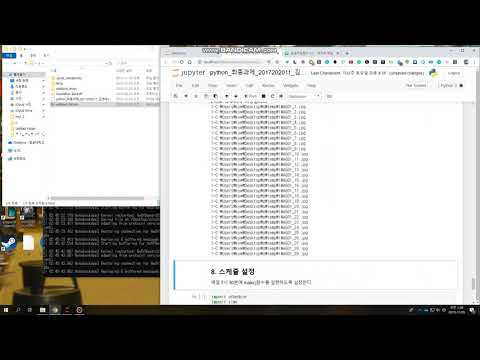

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('fU1cWDx7EvU') # 압축폴더에 첨부된 동영상과 같음

### 5-2. 전송된 메일 목록 및 메일 내용

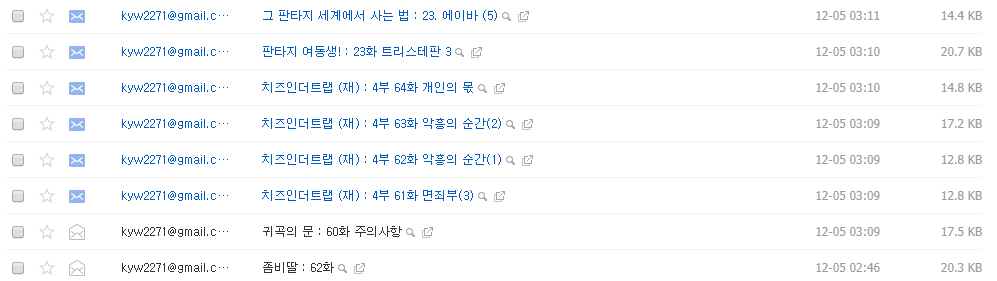

In [6]:
from IPython.display import Image
Image("결과 자료/메일 목록.png")

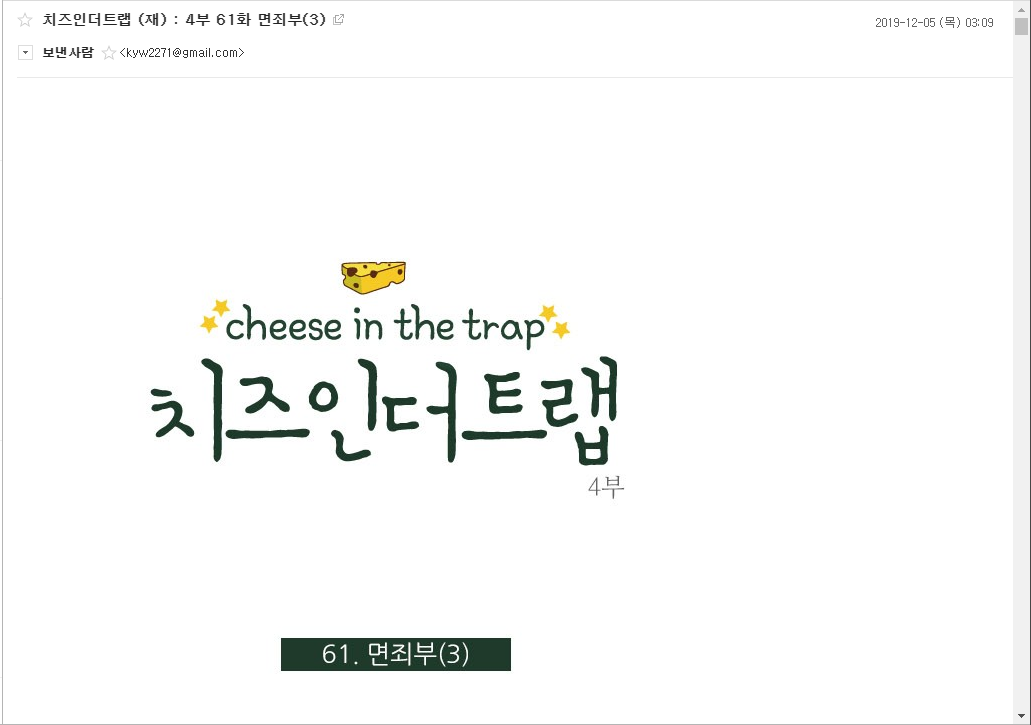

In [7]:
from IPython.display import Image
Image("결과 자료/메일 내용.png")

### 5-3. 웹툰 저장 파일 목록 및 내용

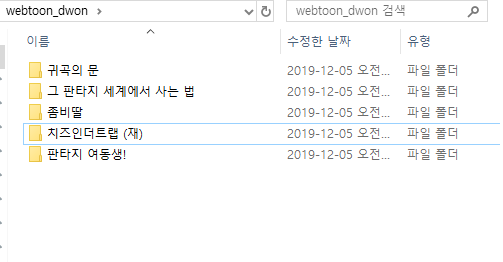

In [3]:
from IPython.display import Image
Image("결과 자료/웹툰 파일 목록.png")

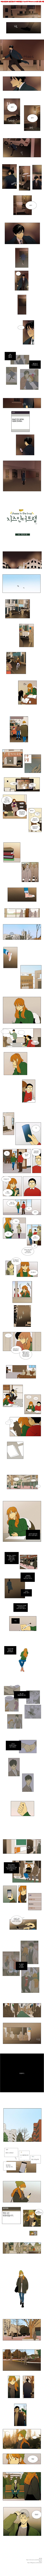

In [9]:
from IPython.display import Image
Image("webtoon_dwon/치즈인더트랩 (재)/298화/4부 64화 개인의 몫.jpg")

실제로 저장된 웹툰과 경고문   
아래의 저장된 웹툰과 실제 웹툰 페이지의 비교
https://comic.naver.com/webtoon/detail.nhn?titleId=720121&no=298&weekday=mon

---

### 5-4. 결론
이번 프로젝트는 불법 배포를 목적으로 하지 않으며 개인 소장 및 순수 개발능력 향상을 위하여 제작하였다.   
웹툰을 하나의 파일로 저장하고 싶었지만, 파이썬 PIL모듈의 용량한계로 1~3개로 나누어 저장하게 되었다.  
이후 시간이 있으면 합친 이미지를 PDF 페이지 형식으로 붙일 예정이다.  
temp폴더 또한 모든 절차가 끝난 후 삭제하여야 하였다. 그러나 삭제 시 마지막으로 열린 이미지를 삭제할때 PIL모듈과 오류가 발생하였다.   
결국 temp폴더를 삭제하는 것 없이 그냥 덮어씌워 사용하는 방법으로 선회 하였다.   

# 6. 기타 참고자료 및 출처사항
#### (1) 파이썬 웹툰 다운로드 (웹에서 분할된 웹툰 다운로드 코드 참조)  
https://gist.github.com/allieus/13c1a80ef5648c2b9b112e1c58f9727b

#### (2) 쿠키런 글씨체  폰트 파일 
https://www.cookierunfont.com/#section7